In [1]:
import Plots , Flux , Statistics

In [2]:
# Generating a Dataset
X = trunc.(rand(250) * 500)
f(x) = @. x *3 + 45;
Y = f(X)
Y += randn(250) * 50

250-element Vector{Float64}:
 1495.3748439127944
 1509.9472031909916
 1056.1096472836823
  110.04879953034767
   84.98597385979822
  315.25623192260525
  459.42255190428637
 1324.4780153919783
  253.91854956701664
 1539.8842707226324
    ⋮
  945.1641376552227
  303.8599209160518
 1142.775194410734
  406.0793040149603
  230.54239926653622
 1320.4310543854529
  467.6347478649764
 1246.0053490391401
  670.2265793248628

In [3]:
X |> size

(250,)

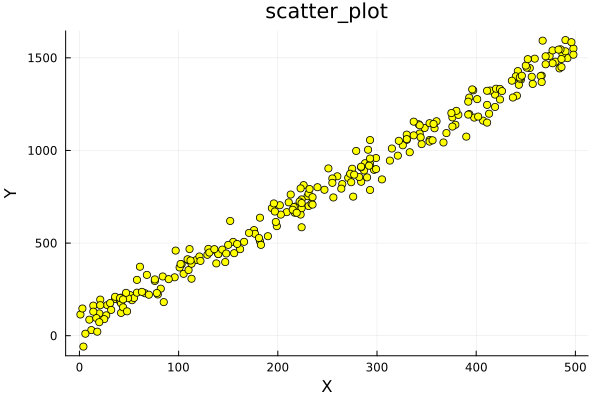

In [4]:
Plots.scatter(X,Y,color=:yellow,xlabel="X",ylabel="Y",
                title="scatter_plot",legend=false)

In [147]:
# Build a simple regression
# The model needs to a loss function
MSE(y,ŷ) = sum((y .- ŷ).^2) / length(y)

function simple_regression(X , Y , epochs , lr = 0.01)
    error = []
    len = length(Y)
    a0 , a1 = (0,0) # Coefficients
    for e in 1:epochs # Training loop
        # print("[$("=" ^ Int(round(200 * e/epochs)))] -> $(round((e*100/epochs),digits=2)) \r")
        Ŷ = a0 .+ a1 .* X # Predict Y
        # Update coefficients
        a0 = a0 -  (lr * 2 * Statistics.mean((Ŷ - Y)))
        a1 = a1 -  (lr * 2 * Statistics.mean((Ŷ - Y) .* X))
        append!(error,MSE(Y,Ŷ))
    end
    println("Done ☑ ")
    return a0 ,a1 , error
end


simple_regression (generic function with 2 methods)

In [145]:
a0,a1,error = simple_regression(X , Y , 1000, 0.00001)
Ŷ = a0 .+ a1 .* X

Done ☑ 


250-element Vector{Float64}:
 1438.905864350148
 1485.920447531709
  918.611143807539
   84.88586872118974
   62.94572990312791
  301.1529513563706
  304.287256901808
 1244.578920533029
  257.2726737202469
 1495.3233641680213
    ⋮
  981.2972547162871
  238.4668404476225
 1119.2066987155329
  351.30184008336903
  244.7354515384973
 1335.4737813507136
  348.1675345379316
 1288.4591981691526
  617.7178114455483

In [121]:
a0

-9.058378320861144e-28

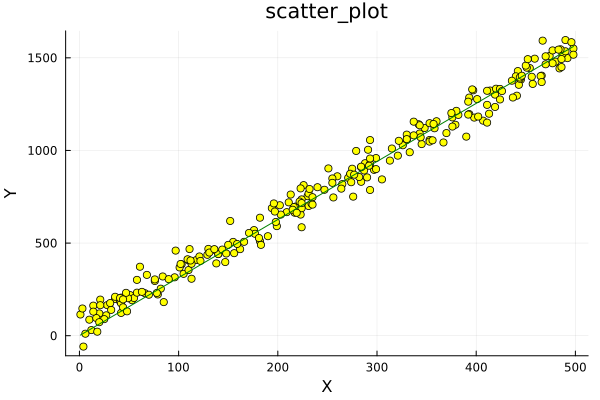

In [146]:


Plots.scatter(X,Y,color=:yellow,xlabel="X",ylabel="Y",
                title="scatter_plot",legend=false)

Plots.plot!(X,Ŷ,color = :green)
